In [1]:
import matplotlib.pylab as plt
import numpy as np
plt.style.use("/afs/ihep.ac.cn/users/l/luoxj/Style/Paper.mplstyle")
%config InlineBackend.figure_format = 'svg'
import sys
sys.path.append("/afs/ihep.ac.cn/users/l/luoxj/root_tool/python_script/")
from LoadMultiFiles import LoadMultiFiles
from ReweightSamples import GetReweightSamples

uniform_samples = False
if uniform_samples:
    name_files = "/afs/ihep.ac.cn/users/l/luoxj/gpu_500G/DSNB_component_fitting/predict_withpdgdep/predict_*.npz"
else:
    name_files = "/afs/ihep.ac.cn/users/l/luoxj/gpu_500G/DSNB_component_fitting/predict_withpdgdep_neutron_0_0_0/predict_*.npz"
dir_evts = LoadMultiFiles(name_files)

key in files:	 ['dir_events']
Loaded Data Keys:	 dict_keys(['equen', 'edep', 'pdg', 'init_p', 'vertex', 'pdg_pdgdep', 'equen_pdgdep', 'edep_pdgdep', 'PSD', 'h_time', 'PSD_with_charge', 'h_time_with_charge', 'name_file_source', 'entry_source', 'h_time_truth', 'h_time_with_charge_truth', 'lepton_ratio'])


In [2]:
# dir_evts["lepton_ratio"][dir_evts["lepton_ratio"]<0] = 0
index_lepton_ratio_filter = (dir_evts["lepton_ratio"]>=0)
for key in dir_evts.keys():
    if len(dir_evts[key])==0:
        continue
    dir_evts[key] = dir_evts[key][index_lepton_ratio_filter]


In [3]:
# plt.hist(dir_evts["lepton_ratio"], bins=np.concatenate((np.linspace(0,0.1,10), 
#                                                         np.linspace(0.1, 1, 20))))

In [4]:
# import random
# h_lepton_ratio, h_edges = np.histogram(dir_evts["lepton_ratio"], bins=100)
# total_n_samples_to_select = h_lepton_ratio[0]
# n_samples_to_select = np.mean(h_lepton_ratio[1:])
# ratio_abort = 1 - n_samples_to_select/total_n_samples_to_select
# index_need_to_select = np.where(dir_evts["lepton_ratio"]<=h_edges[1])[0]
# index_abort = random.sample(list(index_need_to_select), int(len(index_need_to_select)*ratio_abort))
# index_remain = np.array([True]*len(dir_evts["lepton_ratio"]))
# index_remain[index_abort] = False
# for key in dir_evts.keys():
#     if key == "edep":
#         continue
#     dir_evts[key] = np.array(dir_evts[key])[index_remain]

405.0


Text(0.5, 1.0, 'Lepton Ratio ( After Reweighting ) ')

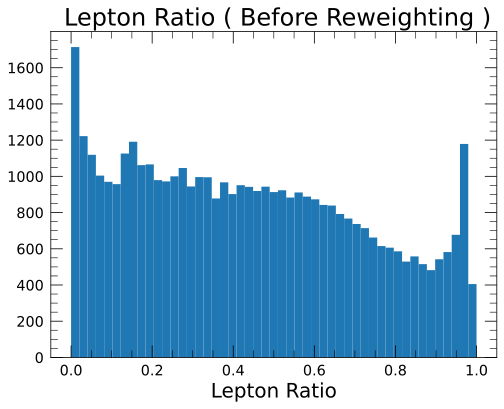

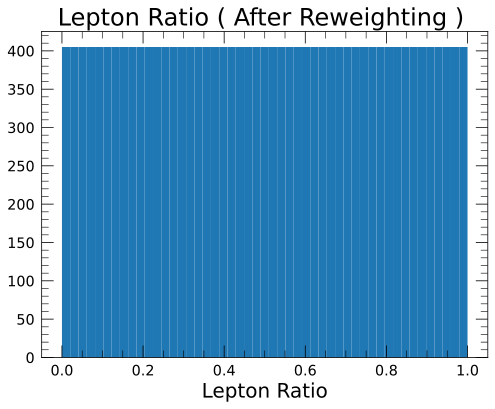

In [5]:
plt.figure()
bins = np.linspace(0, 1,50)
h = plt.hist(dir_evts["lepton_ratio"], bins=bins)
plt.xlabel("Lepton Ratio")
plt.title(" Lepton Ratio ( Before Reweighting )")
print(np.min(h[0]))

index_number_select = GetReweightSamples(dir_evts["lepton_ratio"], h[0], h[1], np.ones(len(h[0])))

plt.figure()
plt.hist(dir_evts["lepton_ratio"][index_number_select], bins=bins)
plt.xlabel("Lepton Ratio")
plt.title("Lepton Ratio ( After Reweighting ) ")


In [6]:
import random
print(index_number_select)
random.shuffle(index_number_select)
print(index_number_select)

[21466, 16815, 38733, 12035, 32551, 9362, 24816, 38441, 20287, 28568, 25376, 12694, 23265, 33672, 40309, 3187, 20818, 28600, 1152, 32813, 15998, 23682, 6149, 23746, 21519, 4858, 22195, 18652, 37413, 27581, 41857, 25077, 19098, 36471, 25731, 23037, 34883, 42250, 777, 9642, 570, 31369, 31948, 12689, 23148, 11313, 23927, 10199, 18439, 31763, 15689, 22445, 16346, 6462, 24599, 31268, 10221, 37531, 4126, 42533, 10173, 28066, 27573, 26444, 2395, 24045, 40747, 15453, 2747, 19993, 18780, 25392, 40805, 31750, 23104, 28035, 39013, 2810, 9884, 24254, 31566, 9086, 39698, 38230, 39601, 41137, 31748, 3247, 22859, 28499, 33928, 5092, 12824, 15083, 38248, 4046, 35126, 17936, 2052, 34050, 17882, 30697, 3216, 15390, 21177, 11709, 1635, 19685, 33131, 34750, 12320, 42206, 26607, 3480, 14408, 11901, 38081, 29006, 3057, 5569, 25405, 20850, 10360, 38700, 41908, 20186, 16091, 30176, 12858, 41463, 16420, 880, 40109, 40121, 39786, 4256, 42615, 36208, 37310, 12985, 24499, 38525, 37526, 36875, 40894, 39999, 22842,

(array([1997., 1960., 1950., 1961., 1955., 1979., 1958., 1969., 1950.,
        2166.]),
 array([0.00128351, 0.10016053, 0.19903755, 0.29791457, 0.39679159,
        0.49566861, 0.59454563, 0.69342265, 0.79229968, 0.8911767 ,
        0.99005372]),
 <BarContainer object of 10 artists>)

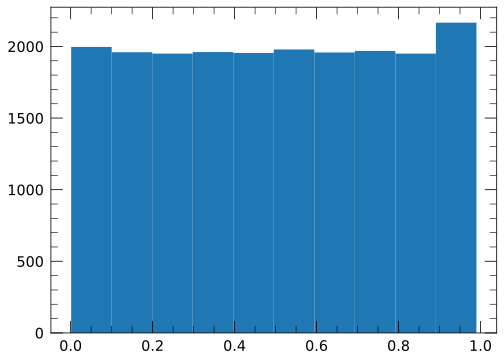

In [7]:

dir_save = {}
for key in dir_evts.keys():
    if len(dir_evts[key])==0:
        continue
    dir_save[key] = dir_evts[key][index_number_select]
plt.hist(dir_save["lepton_ratio"])

In [8]:
# np.savez("")
import os
dir_name = os.path.dirname(name_files)
print(dir_name)
if uniform_samples:
    np.savez(f"{dir_name}/uniform_predict.npz", dir_events=dir_save)
else:
    np.savez(f"{dir_name}/center_predict.npz", dir_events=dir_save)


/afs/ihep.ac.cn/users/l/luoxj/gpu_500G/DSNB_component_fitting/predict_withpdgdep_neutron_0_0_0


In [9]:
print(len(dir_save["PSD"]))

19845
